Book 1  
Chapter 12 Descriptive Statistics Using Seaborn
### `Seaborn` 可视化数据

In [2]:
# 导入包
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

if not os.path.isdir('Figures'):
    os.makedirs('Figures')

In [3]:
# 导入鸢尾花数据
iris_sns = sns.load_dataset('iris')
iris_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 一元特征数据

#### 直方图

- 用于显示数值变量的分布情况
- 将数据划分为不同的区间(也称"柱子")，一般计算每个区间内的数据频数(样本数量)
- 直方图的 x 轴表示变量的取值范围，而 y 轴表示频数、概率、概率密度
    - 频数: 柱子高度为频数 (25)，柱子的高度之和为样本总数 (150)
    - 概率: 柱子高度为对应的概率 (25/150)，柱子的高度之和为1
    - 概率密度: 柱子高度为对应的概率密度 (25/150/0.2 (柱子宽度))，柱子的面积之和为1

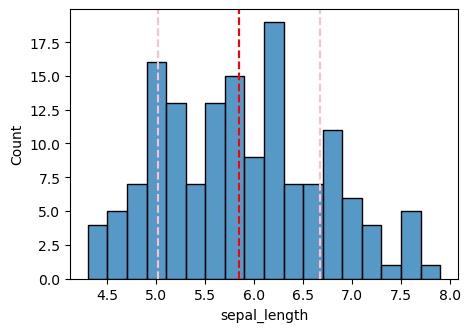

In [6]:
# 绘制花萼长度样本数据直方图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.histplot(data=iris_sns, x='sepal_length', binwidth=0.2, ax=ax)
# 纵轴三个选择: stat='count' 频数、'probability' 概率、'density' 概率密度
# bins 指定直方图区间数量，binwidth 定义区间宽度

ax.axvline(x=iris_sns.sepal_length.mean(), color='r', ls='--') # 增加均值位置竖直参考线
# iris_sns.sepal_length.mean(): 链式法则 method chaining

ax.axvline(x=iris_sns.sepal_length.mean()-iris_sns.sepal_length.std(), color='pink', ls='--')
ax.axvline(x=iris_sns.sepal_length.mean()+iris_sns.sepal_length.std(), color='pink', ls='--')

# https://seaborn.pydata.org/tutorial/distributions.html

<Axes: xlabel='sepal_length', ylabel='Density'>

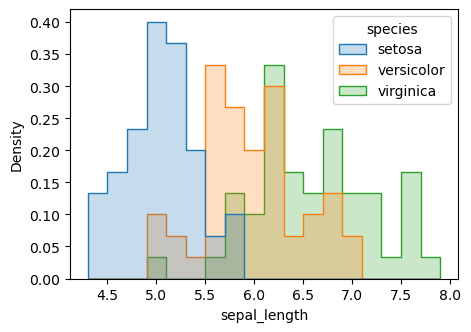

In [7]:
# 绘制花萼长度样本数据直方图，考虑鸢尾花分类
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.histplot(data=iris_sns, x='sepal_length', hue='species', # 每个类别鸢尾花单独的直方图
             binwidth=0.2, ax=ax, element='step',            # element{“bars”, “step”, “poly”}
             stat='density')                                 # 纵轴为概率密度

<Axes: xlabel='sepal_length', ylabel='species'>

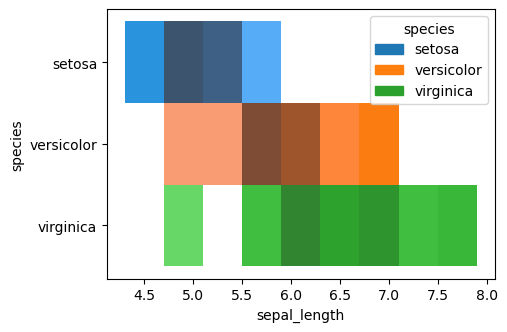

In [8]:
# 二维直方热图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.histplot(data=iris_sns, x='sepal_length',
             y='species', # seaborn.histplot() 还可以用来绘制二维直方热图
             hue='species', legend=True, ax=ax)

<Axes: xlabel='species', ylabel='sepal_length'>

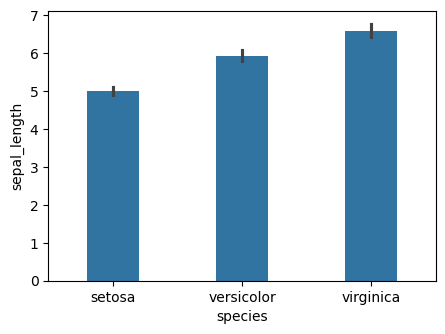

In [9]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.barplot(data=iris_sns, x='species', y='sepal_length', width=0.4) # mean with errorbar

#### 核密度估计 KDE

<Axes: xlabel='sepal_length', ylabel='Density'>

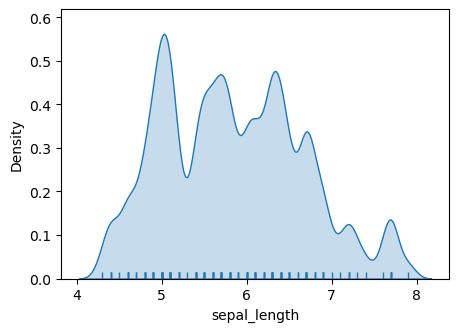

In [11]:
# 绘制花萼长度样本数据，高斯核密度估计
# 图5 KDE 是图1直方图的“平滑”处理结果
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.kdeplot(data=iris_sns, x='sepal_length',
            bw_adjust=0.3, fill=True)

# 毛毯图
sns.rugplot(data=iris_sns, x='sepal_length')

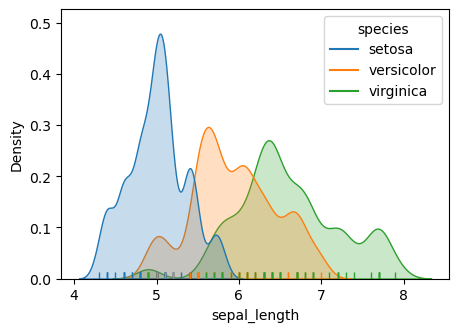

In [12]:
# 绘制花萼长度样本数据，高斯核密度估计，考虑鸢尾花类别
# 图6中三条曲线叠加便得到图5
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.kdeplot(data=iris_sns, x='sepal_length', hue='species', # 用 hue 来绘制三类鸢尾花种类各自的分布
            bw_adjust=0.5, fill=True)
sns.rugplot(data=iris_sns, x='sepal_length', hue='species')

fig.savefig('Figures/一元，kdeplot + rugplot + hue.svg', format='svg')

<Axes: xlabel='sepal_length', ylabel='Density'>

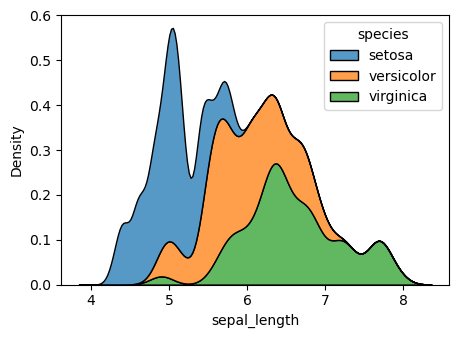

In [13]:
# 绘制花萼长度样本数据，高斯核密度估计，考虑鸢尾花类别，堆叠
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.kdeplot(data=iris_sns, x='sepal_length', hue='species',
            multiple='stack', bw_adjust=0.5)

<Axes: xlabel='sepal_length', ylabel='Density'>

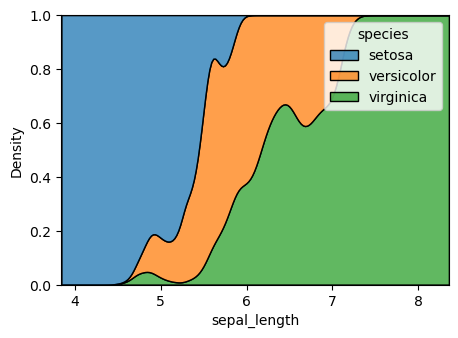

In [14]:
# 绘制后验概率(成员值)
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.kdeplot(data=iris_sns, x='sepal_length', hue='species',
            bw_adjust=0.5, multiple='fill') # 每条曲线都是后验概率 posterior，后验概率值可以用来完成分类

# 给定具体花萼长度，比较该点处红蓝绿三条曲线对应的宽度
# 最宽的曲线对应的鸢尾花种类可以作为该点的鸢尾花分类预测值
# 这个后验概率值也叫成员值 membership score

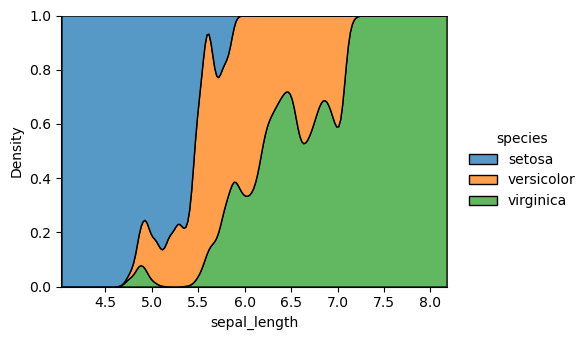

In [15]:
# 第二种方法 distribution plots
sns.displot(
    data=iris_sns,
    x='sepal_length', hue='species',
    kind='kde', bw_adjust=0.3,
    multiple='fill',
    height=3.5, aspect=1.35 # figsize does not work with sns.displot
)

#### 分散图

<Axes: xlabel='sepal_length', ylabel='species'>

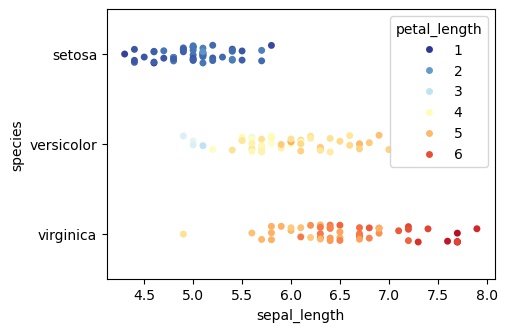

In [17]:
# 绘制鸢尾花花萼长度分散点图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.stripplot(data=iris_sns, x='sepal_length', y='species',
              hue='petal_length', palette='RdYlBu_r', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

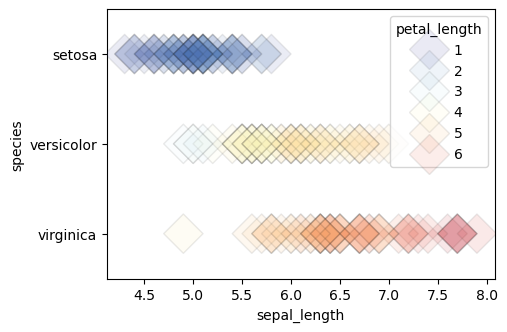

In [18]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.stripplot(data=iris_sns, x='sepal_length', y='species', hue='petal_length',
              jitter=False, s=20, marker='D', linewidth=1, alpha=.1,
              palette='RdYlBu_r')

#### 小提琴图

<Axes: xlabel='sepal_length'>

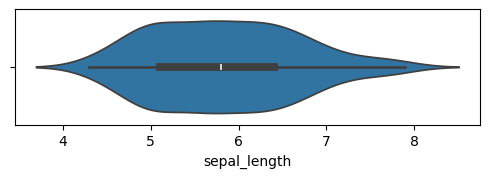

In [20]:
# 绘制花萼长度样本数据，小提琴图
fig, ax = plt.subplots(figsize=(6, 1.5))

sns.violinplot(data=iris_sns, x='sepal_length', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

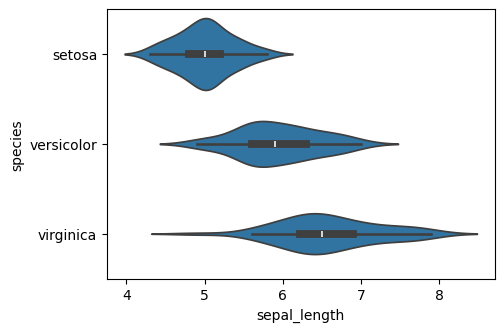

In [21]:
# 绘制花萼长度样本数据，小提琴图，考虑分类
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.violinplot(data=iris_sns, x='sepal_length',
               y='species', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

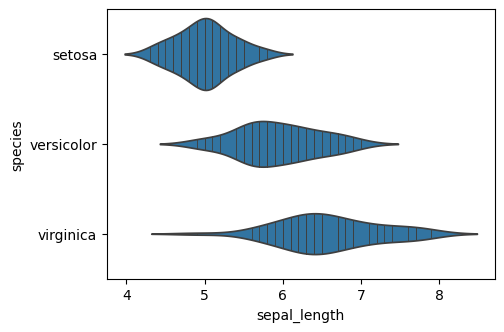

In [22]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.violinplot(data=iris_sns, x='sepal_length',
               y='species', inner='stick')

#### 蜂群图

<Axes: xlabel='sepal_length'>

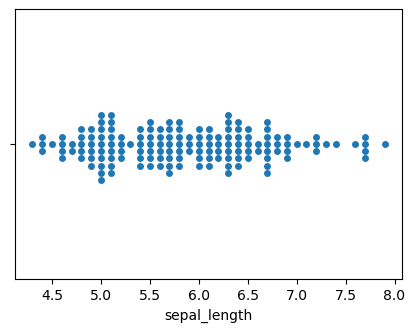

In [24]:
# 绘制花萼长度样本数据，蜂群图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.swarmplot(data=iris_sns, x='sepal_length', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

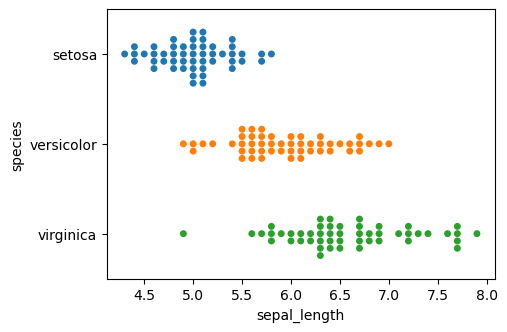

In [25]:
# 绘制花萼长度样本数据，蜂群图，考虑分类
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.swarmplot(data=iris_sns, x='sepal_length', y='species',
              hue='species', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

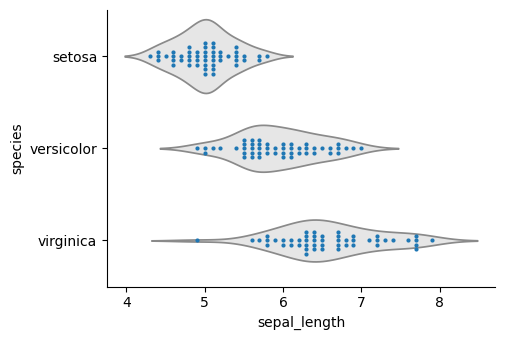

In [26]:
# 蜂群图 + 小提琴图，考虑鸢尾花分类
sns.catplot(data=iris_sns, x='sepal_length', y='species',
            kind='violin', color='.9', inner=None,
            height=3.5, aspect=1.45)
# seaborn.catplot() 分类图
# Figure-level function, cannot use axes
sns.swarmplot(data=iris_sns, x='sepal_length', y='species', size=3)

#### 箱型图

<Axes: xlabel='sepal_length'>

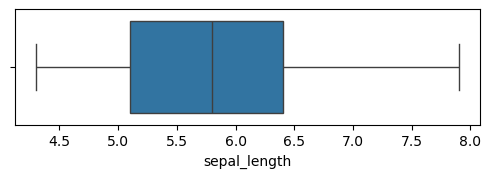

In [28]:
# 绘制鸢尾花花萼长度箱型图
fig, ax = plt.subplots(figsize=(6, 1.5))

sns.boxplot(data=iris_sns, x='sepal_length', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

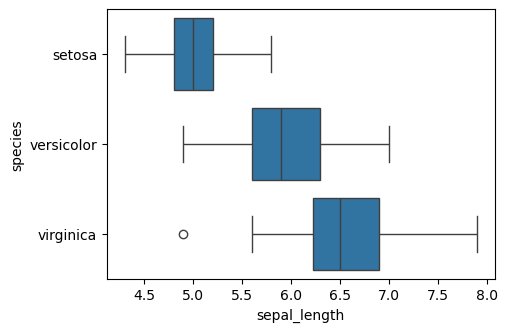

In [29]:
# 绘制鸢尾花花萼长度箱型图，考虑鸢尾花分类
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.boxplot(data=iris_sns, x='sepal_length',
            y='species', ax=ax)

<Axes: xlabel='sepal_length', ylabel='species'>

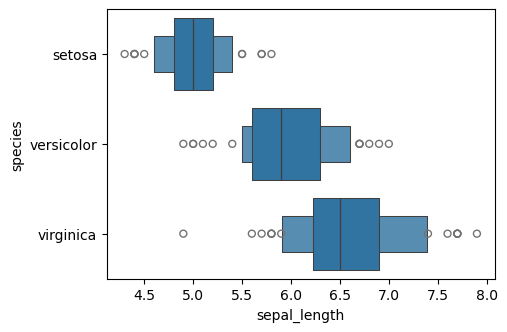

In [30]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.boxenplot(data=iris_sns, x='sepal_length', y='species', scale='linear')
# sns.boxenplot() draws an enhanced box plot for larger datasets

### 二元

#### 散点图 + 毛毯图

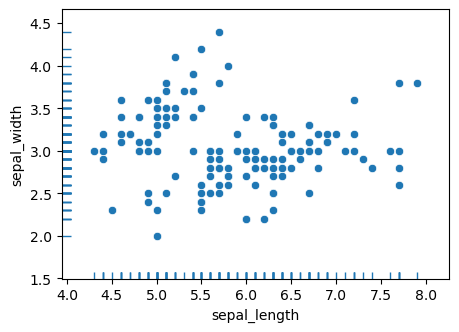

In [33]:
# 鸢尾花散点图 + 毛毯图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.scatterplot(data=iris_sns, x='sepal_length', y='sepal_width')
sns.rugplot(data=iris_sns, x='sepal_length', y='sepal_width')

fig.savefig('Figures/二元，scatterplot + rugplot.svg', format='svg')

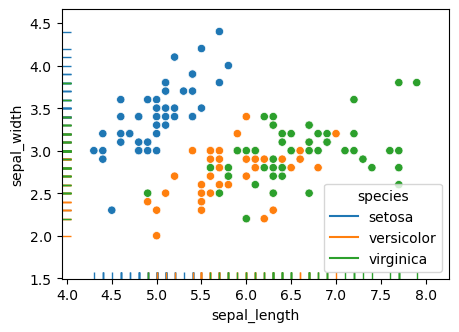

In [34]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.scatterplot(data=iris_sns, x='sepal_length', y='sepal_width',
                hue='species')
sns.rugplot(data=iris_sns, x='sepal_length', y='sepal_width',
            hue='species')

fig.savefig('Figures/二元，scatterplot + rugplot + hue.svg', format='svg')

#### 散点图 + 箱型图

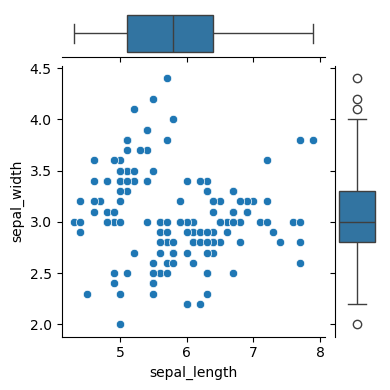

In [36]:
g = sns.JointGrid(data=iris_sns, x='sepal_length', y='sepal_width', height=4)

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)

#### 散点图 + KDE

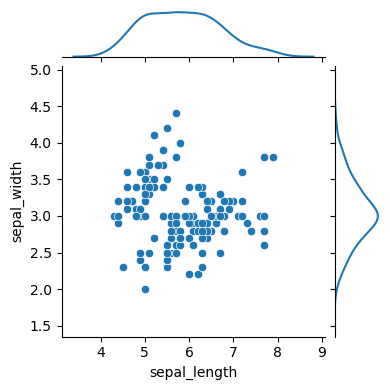

In [38]:
g = sns.JointGrid(data=iris_sns, x='sepal_length', y='sepal_width', height=4)

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

#### 散点图 + KDE + 箱型图

<Axes: xlabel='Density', ylabel='sepal_width'>

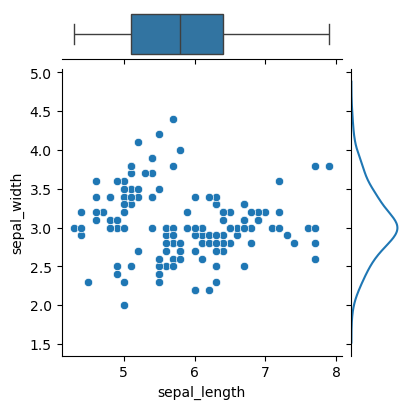

In [40]:
g = sns.JointGrid(height=4)
x, y = iris_sns['sepal_length'], iris_sns['sepal_width']

sns.scatterplot(x=x, y=y, ax=g.ax_joint)
sns.boxplot(x=x, ax=g.ax_marg_x)
sns.kdeplot(y=y, ax=g.ax_marg_y)

#### 频率/概率热图

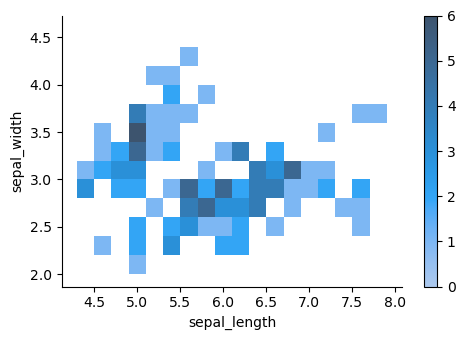

In [42]:
# 鸢尾花二元频率直方热图
sns.displot(data=iris_sns, x='sepal_length', y='sepal_width',
            binwidth=(0.2, 0.2), cbar=True, height=3.5, aspect=1.45)

#### 二元概率密度估计 KDE

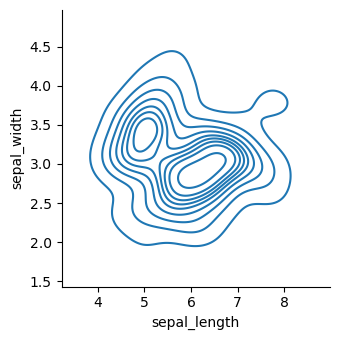

In [44]:
# 联合分布概率密度等高线
sns.displot(data=iris_sns, x='sepal_length', y='sepal_width', kind='kde', height=3.5)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

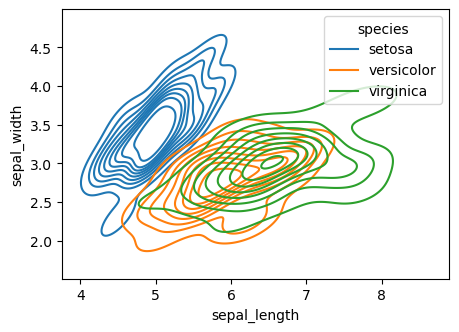

In [45]:
# 联合分布概率密度等高线，考虑分布
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.kdeplot(data=iris_sns, x='sepal_length', y='sepal_width', hue='species')

#### 线性回归

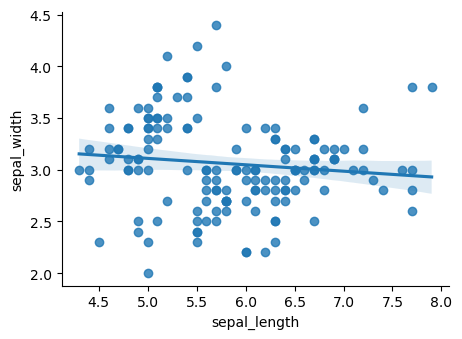

In [47]:
# 可视化线性回归关系
sns.lmplot(data=iris_sns, x='sepal_length', y='sepal_width',
           height=3.5, aspect=1.35)

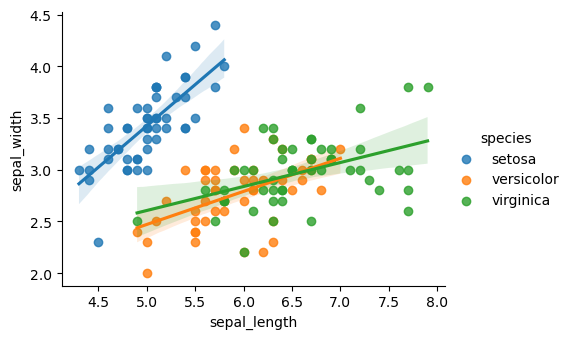

In [48]:
# 可视化线性回归关系，考虑鸢尾花分类
sns.lmplot(data=iris_sns, x='sepal_length', y='sepal_width',
           height=3.5, aspect=1.35, hue='species')

#### 散点图 + 边缘直方图

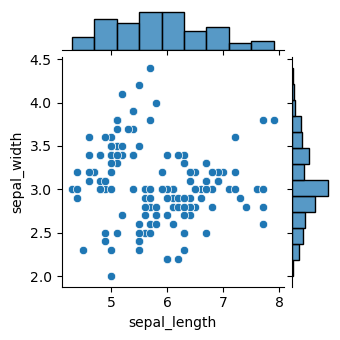

In [50]:
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5)

#### 散点图 + 边缘 KDE

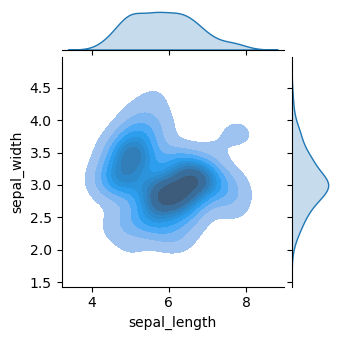

In [52]:
# 联合分布、边缘分布
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5,
              kind='kde', fill=True)

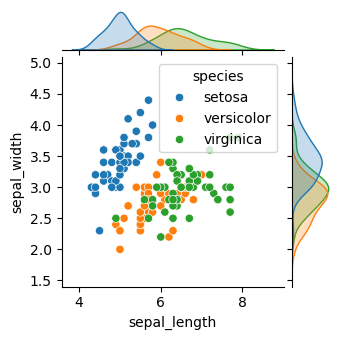

In [53]:
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5,
              hue='species')

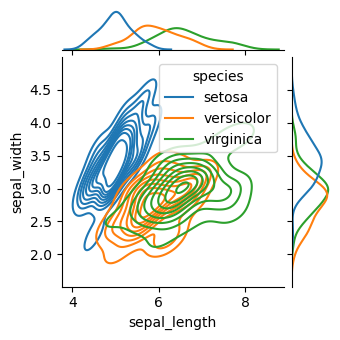

In [54]:
# 联合分布、边缘分布，考虑鸢尾花分类
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5,
              hue='species', kind='kde')

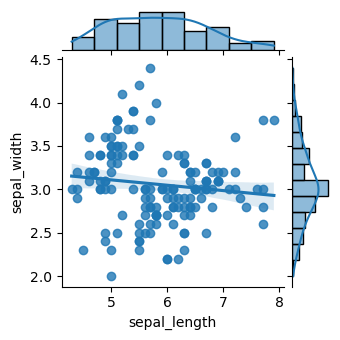

In [55]:
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5,
              kind='reg')

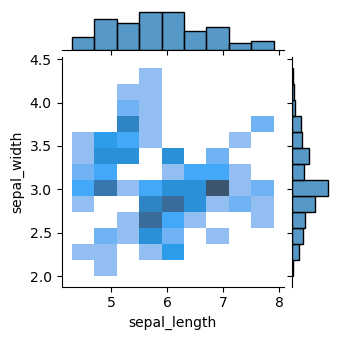

In [56]:
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5,
              kind='hist')

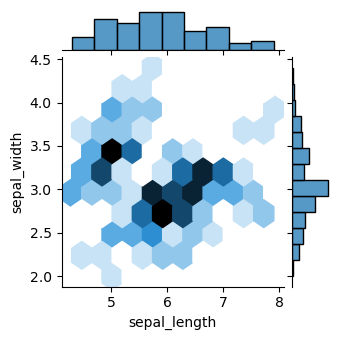

In [57]:
sns.jointplot(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5,
              kind='hex')

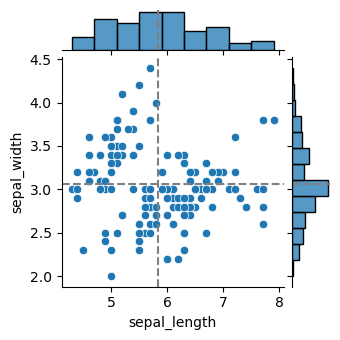

In [58]:
g = sns.JointGrid(data=iris_sns, x='sepal_length', y='sepal_width', height=3.5)

g.plot(sns.scatterplot, sns.histplot)
g.refline(x=iris_sns['sepal_length'].mean(), y=iris_sns['sepal_width'].mean())

### 多元

#### 分散图

In [61]:
# 数据从宽格式 wide format 转换为长格式 long format
iris_melt = pd.melt(iris_sns, id_vars='species', var_name='measurement')
print(iris_sns.head())
print(iris_melt.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


<Axes: xlabel='value', ylabel='measurement'>

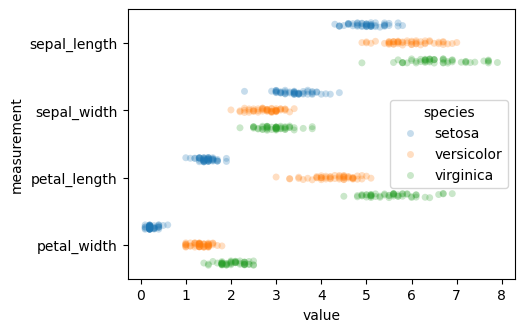

In [62]:
# 绘制多特征分散图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.stripplot(data=iris_melt, x='value', y='measurement', hue='species',
              dodge=True, # Separate the strips for different hue levels
              alpha=.25, zorder=1, legend=True)

#### 小提琴图

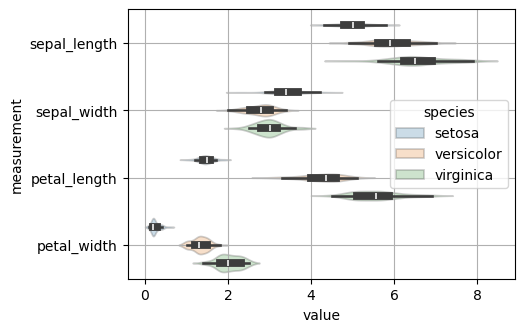

In [64]:
# 绘制多特征小提琴图
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.violinplot(data=iris_melt, x='value', y='measurement', hue='species',
               dodge=True, alpha=0.25, zorder=1, legend=True)

plt.grid()

#### 热图

<Axes: >

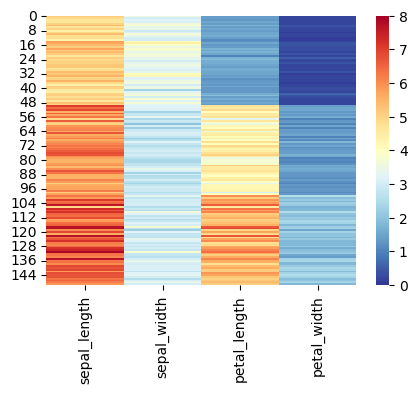

In [66]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.heatmap(data=iris_sns.iloc[:, :-1], cmap='RdYlBu_r', vmin=0, vmax=8)

#### 聚类热图

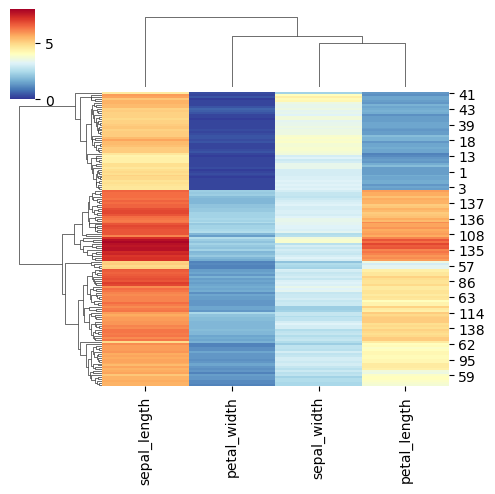

In [68]:
# 聚类热图
sns.clustermap(iris_sns.iloc[:, :-1], cmap='RdYlBu_r', vmin=0, vmax=8,
               figsize=(5, 5))

#### 成对特征散点图

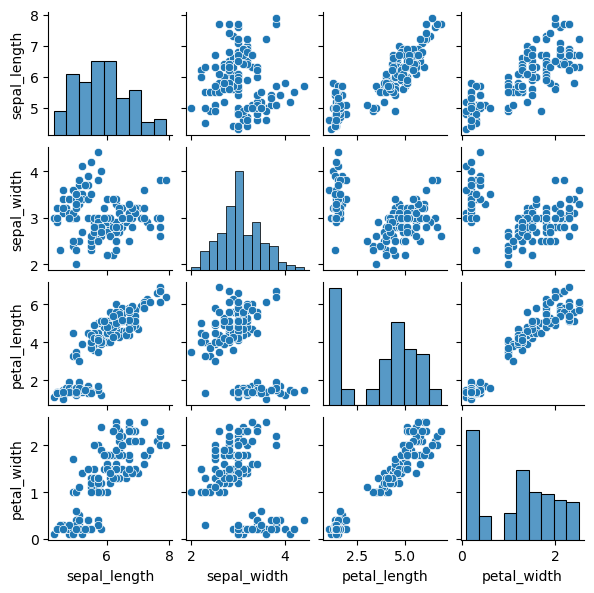

In [70]:
sns.pairplot(data=iris_sns, height=1.5)

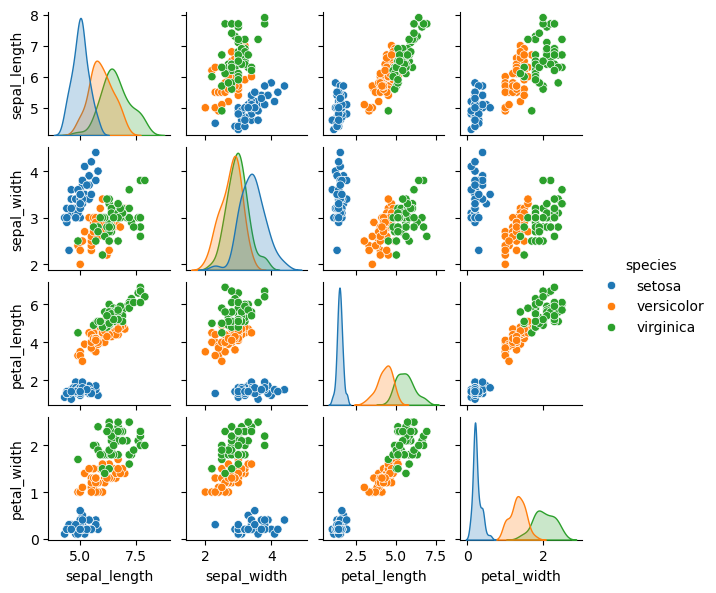

In [71]:
# 绘制成对特征散点图
sns.pairplot(iris_sns, hue='species', height=1.5)

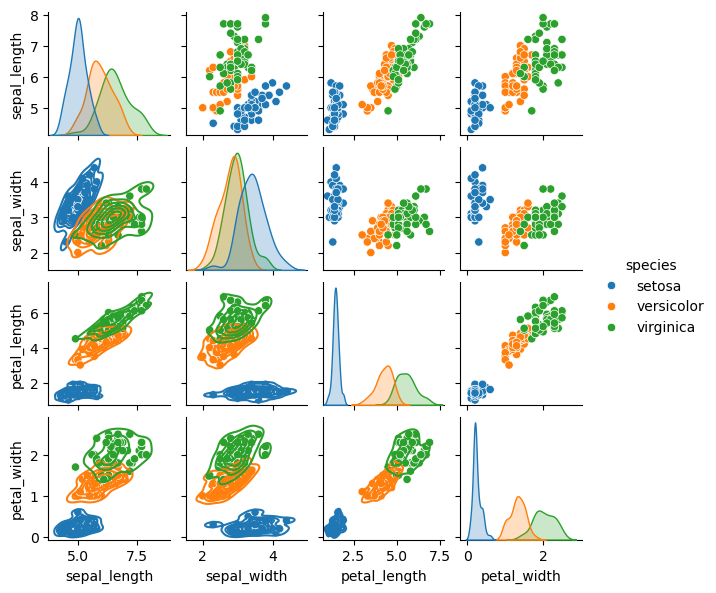

In [72]:
g = sns.pairplot(iris_sns, hue='species', height=1.5)
g.map_lower(sns.kdeplot, levels=8, color='.2')

#### 平行坐标图

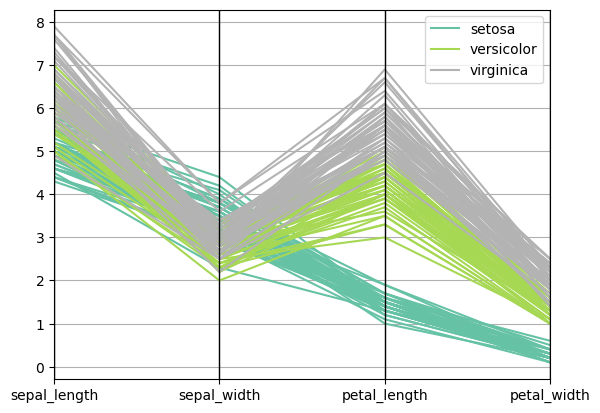

In [74]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(iris_sns, class_column='species', colormap=plt.get_cmap('Set2'))

plt.show()

#### 安德鲁斯曲线

<Axes: >

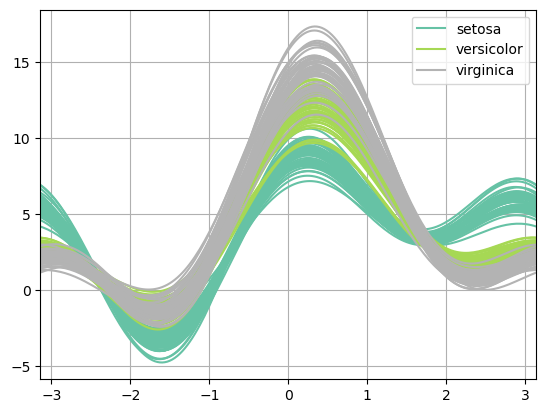

In [76]:
from pandas.plotting import andrews_curves

andrews_curves(iris_sns, 'species', colormap=plt.get_cmap('Set2'))

#### Radviz 雷达图

<Axes: >

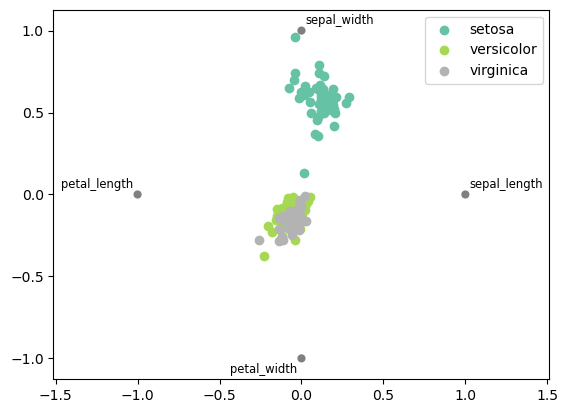

In [78]:
from pandas.plotting import radviz

radviz(iris_sns, 'species', colormap=plt.get_cmap('Set2'))

#### 协方差矩阵

- 对角线上的元素为各个随机变量的方差
- 非对角线上的元素为两两随机变量之间的协方差

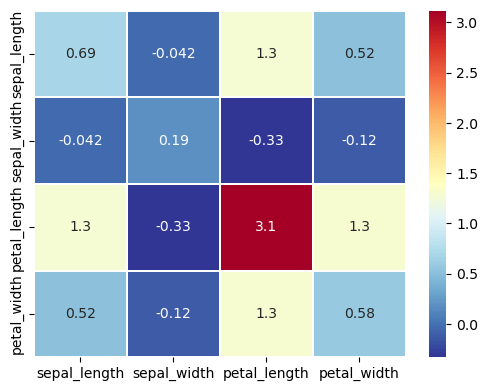

In [80]:
SIGMA = iris_sns.iloc[:, :-1].cov()

fig, axs = plt.subplots(figsize=(6, 4.5))

h = sns.heatmap(SIGMA, cmap='RdYlBu_r', linewidths=.05, annot=True)

Text(0.5, 1.0, 'Virginica')

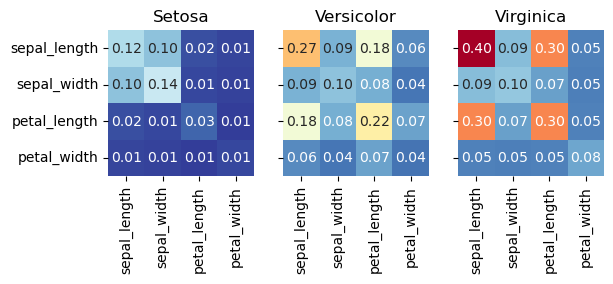

In [81]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
features = list(iris_sns.columns)[:-1]

g1 = sns.heatmap(iris_sns.loc[iris_sns.species=='setosa', features].cov(),
                 cmap='RdYlBu_r', fmt='.2f',
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)
ax1.set_title('Setosa')

g2 = sns.heatmap(iris_sns.loc[iris_sns.species=='versicolor', features].cov(),
                 cmap='RdYlBu_r', fmt='.2f',
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)
ax2.set_title('Versicolor')

g3 = sns.heatmap(iris_sns.loc[iris_sns.species=='virginica', features].cov(),
                 cmap='RdYlBu_r', fmt='.2f',
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)
ax3.set_title('Virginica')

#### 相关性系数矩阵

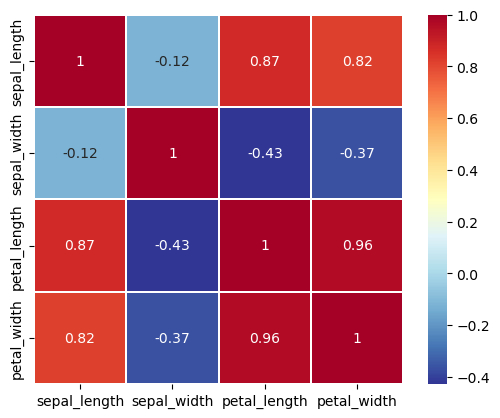

In [83]:
RHO = iris_sns.iloc[:, :-1].corr()

fig, ax = plt.subplots()

h = sns.heatmap(RHO, cmap='RdYlBu_r', linewidths=.05, annot=True)

h.set_aspect('equal')

Text(0.5, 1.0, 'Virginica')

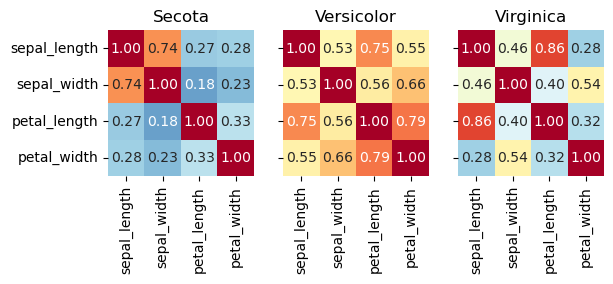

In [84]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
features = list(iris_sns.columns)[:-1]

g1 = sns.heatmap(iris_sns.loc[iris_sns.species == 'setosa', features].corr(),
                 cmap='RdYlBu_r', fmt='.2f',
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0)
ax1.set_title('Secota')

g2 = sns.heatmap(iris_sns.loc[iris_sns.species == 'versicolor', features].corr(),
                 cmap='RdYlBu_r', fmt='.2f',
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0)
ax2.set_title('Versicolor')

g3 = sns.heatmap(iris_sns.loc[iris_sns.species == 'virginica', features].corr(),
                 cmap='RdYlBu_r', fmt='.2f',
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0)
ax3.set_title('Virginica')

In [85]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023